In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load some data in a pandas dataframe

df = None
# this data set comes from a system at stationary on/ off states
df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_statesOfFunctioningclean.xlsx", index_col=0)

# this data set comes from a system at non-stationary on/off states
#df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_statesOfFunctioningnoise.xlsx", index_col=0) 

# this data set represents the system during deployment at stationary conditions
#df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_deploymentNormalopen.xlsx", index_col=0)

# this data set represents the system during deployment at non-stationary conditions
#df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_deploymentNormalclosed.xlsx", index_col=0)

#df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [3]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

df.dtypes

systemState     object
VoltageA0      float64
VoltageA1      float64
VoltageA2        int64
dtype: object

In [4]:
# get a preview on the data

#df.head(3)
df.describe()
#len(df["BRSTVD"])

,VoltageA0,VoltageA1,VoltageA2
count,365.000000,365.000000,365.0
mean,2.106986,1.225425,0.0
std,2.322901,1.351001,0.0
min,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.0
75%,4.660000,2.710000,0.0
max,4.670000,2.720000,0.0


C:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='VoltageA0', ylabel='VoltageA0'>,
        <AxesSubplot:xlabel='VoltageA1', ylabel='VoltageA0'>,
        <AxesSubplot:xlabel='VoltageA2', ylabel='VoltageA0'>],
       [<AxesSubplot:xlabel='VoltageA0', ylabel='VoltageA1'>,
        <AxesSubplot:xlabel='VoltageA1', ylabel='VoltageA1'>,
        <AxesSubplot:xlabel='VoltageA2', ylabel='VoltageA1'>],
       [<AxesSubplot:xlabel='VoltageA0', ylabel='VoltageA2'>,
        <AxesSubplot:xlabel='VoltageA1', ylabel='VoltageA2'>,
        <AxesSubplot:xlabel='VoltageA2', ylabel='VoltageA2'>]],
      dtype=object)

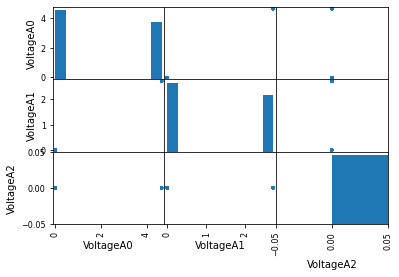

In [5]:
#make some scatter plots

pd.plotting.scatter_matrix(df)

In [6]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


In [7]:
#dispose first column of the dataframe because it is not numerical

X=df.iloc[:,1:]


In [8]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)


In [9]:
#transpose the dataframe while disposing the first non-numerical column

scaler=StandardScaler()

X = scaler.fit_transform(X)
#print(scaler.mean_)


In [10]:
#prepare an elbow plot to visually determine a feasible number of clusters

inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
<ipython-input-10-bee62693683d>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeanModel.fit(X)
<ipython-input-10-bee62693683d>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeanModel.fit(X)
<ipython-input-10-bee62693683d>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeanModel.fit(X)
<ipython-input-10-bee62693683d>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeanMo

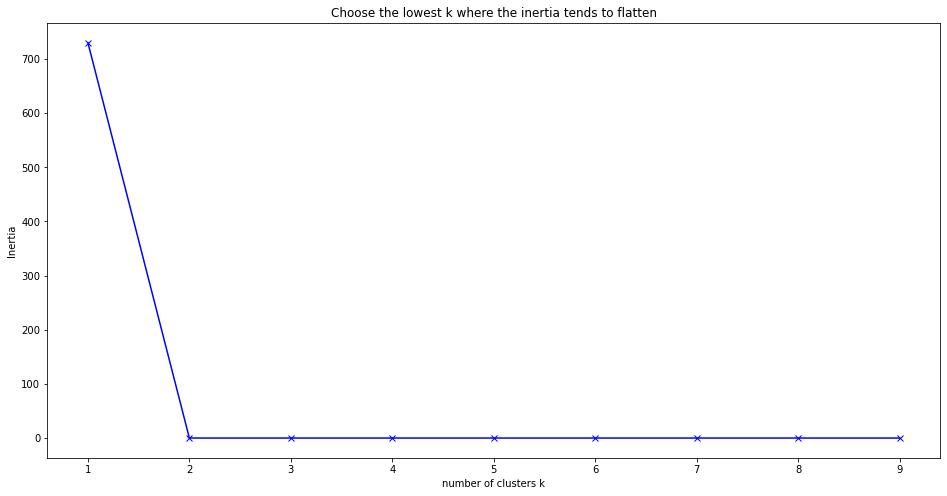

In [11]:
#create the elbow plot

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia')
plt.title('Choose the lowest k where the inertia tends to flatten')
plt.show()


In [12]:
# perform the k-means clustering while filling the preferred number of clusters in the first line

#the number of clusters k is:
k=2

kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)
#kmeanModel.predict(X)


KMeans(n_clusters=2)

In [13]:
# display some properties of the clustering as one whishes to

#kmeanModel.inertia_
#kmeanModel.labels_
#kmeanModel.n_iter_
#kmeanModel.cluster_centers_

In [14]:
# add the clusterlabels to the dataframe of samples

df["clusterlabels"]=kmeanModel.labels_
#df=df.sort_values("clusterlabels")
#df.describe()
dfclustermeans=df.groupby("clusterlabels").mean()
dfclustermeans

,VoltageA0,VoltageA1,VoltageA2
clusterlabels,,,
0,0.000000,0.000000,0
1,4.660909,2.710788,0


In [15]:
# apply the k-means clustering to the Arduino controller

In [16]:
import serial
import time
import keyboard

In [20]:
# connect with Arduino

ser = serial.Serial('COM3', 9600, timeout=1)
time.sleep(1)

In [21]:
# read write the serial connection at a given sampling rate

def write_read(x):
    ser.write(bytes(x, 'utf-8'))
    time.sleep(0.05)
    data = ser.readline()
    return data

In [22]:
# start to control the Arduino while collecting the data

values=[]
timestamp=[]
i= True
num = '0'
print("Press <1> to switch power on")
print("Press <0> to switch power off")
print("Press <q> to quit")
print(".............................")

while i:  # making a loop
    
    if keyboard.is_pressed('q'):  # if key 'q' is pressed 
        print('')
        print('You Pressed <q>uit!')
        i = False                 # finishing the loop
        
    elif keyboard.is_pressed('0'): # if key '0' is pressed
        num = '0'
        
    elif keyboard.is_pressed('1'): # if key '1' is pressed
        num = '1'
        
    else:
        value = write_read(num)                          # if user pressed a key other than the given key the loop will break
        timestamp.append(time.time())
        dummy = value.decode().rstrip().split()
        dum4 = np.array([[float(i) for i in dummy[1:]]])
        dum0 = scaler.transform(dum4)                   # dum0 is a transformation of the data applied during fitting
        dum1 = kmeanModel.predict(dum0)                 # dum1 is the label of the nearest clustermean
        dum2 = kmeanModel.cluster_centers_[dum1]        # dum2 is an array of coordinates of the nearest clustermean
        dum3 = scaler.inverse_transform(dum2)           # reschale     
                                                        #for the SoFu clean data set, the threshold could be 0.03
                                                        #for the SoFu noisy data set, the threshold could be 0.4
                                                        #for the Deployment data sets, the threshold could be 0.10
        
        if (np.linalg.norm(dum4-dum3)>0.03):
            print(str(pd.to_datetime(round(time.time(), 0),unit = 's')),"                                                                                                                                                          ", 
                  " Distance to nearest cluster:", round(np.linalg.norm(dum4-dum3),2),"                                                                                                                                            ",
                  " Process values: ", np.around(dum4[0],2),"                                                                                                                                                                      ",
                  " ANOMALY!!!                                                                                                                                                                                                      ", 
                  ".                                                                                                                                                                                                                ",
                  end = "\r")
    
        else:
            print(str(pd.to_datetime(round(time.time(), 0),unit = 's')),"                                                                                                                                                         ", 
                  " Distance to nearest cluster:", round(np.linalg.norm(dum4-dum3),2),"                                                                                                                                           ",
                  " Process values: ", np.around(dum4[0],2),"                                                                                                                                                                     ",
                  " Nearest cluster mean: ",np.around(dum3[0],2),"                                                                                                                                                                ", 
                  "  .                                                                                                                                                                                                             ",
                  end = "\r")
        
ser.close()

Press <1> to switch power on
Press <0> to switch power off
Press <q> to quit
.............................
2022-07-19 08:24:55                                                                                                                                                            Distance to nearest cluster: 0.0                                                                                                                                              Process values:  [0. 0. 0.]                                                                                                                                                                        Nearest cluster mean:  [-0.  0.  0.]                                                                                                                                                                    .                                                                                                                                                    

# 

# np.around(dum3,2)